In [4]:
from pathlib import Path
import pandas as pd
import re
import MeCab
import matplotlib.pyplot as plt
import matplotlib_fontja
import warnings
import string
import nlplot
from janome.tokenizer import Tokenizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

##### アンケートを分析したい
1. 形態素分析

### アンケート結果の読み込み
###### 参考のアンケート（）

In [5]:
file = './text_questionnaire.xlsx'
df = pd.read_excel(file)
df = df.loc[:,['ID','comment']]
df.head()


,ID,comment
0,1,末永研では燃焼に関して、内舘研では摩擦や物体表面効果など、清水研では金型の研究を見学しました...
1,2,末永研究室では燃焼についての研究をしていた。火を振動させたり固形燃料を使っていたりしていた。...
2,3,様々な分野の研究室を見学したが、なかでも柴田研は大きな企業とも共同研究していると聞き、興味を...
3,4,基礎ゼミナールの第一回目は佐藤研、柴田研、佐々木研、柳岡研を見学して、研究の環境を見ました。...
4,5,佐々木教授、柳岡教授、末永教授の研究室を見学しました。佐々木教授は主に生物工学を研究しており...


In [6]:
comments = df['comment'].dropna().tolist()
# comments

##### 正規表現



In [64]:
# # comments = re.sub('\u3000', '', comments)
tokenizer = Tokenizer()
mecab = MeCab.Tagger('-Owakati')
# mecab = MeCab.Tagger()
# 日本語のストップワード
stop_words = set([
    'の', 'に', 'は', 'を', 'た', 'が', 'で', 'て', 'と', 'し', 'れ', 'さ', 'ある', 'いる',
    'も', 'する', 'から', 'な', 'こと', 'として', 'いく', 'これ', 'それ', 'あれ', 'ここ',
    'そこ', 'あそこ', 'そして', 'でも', 'やっぱり', 'さらに', 'また', 'ただ', 'どう',
    'こう', 'そう', 'ああ', 'お', 'よう', 'なぜ', 'なに', 'なんで', 'へ', 'にて', 'より',
    'い', 'う', 'よ', 'ん', 'ね', 'な', 'や', 'の', 'なり', 'とも', 'も', 'うち', 'なる',
    'です', 'ます', 'まし', 'たい', 'つい', 'ない','など','まだ','だけ','。',
    '、', ',','，'
])

stop_words1 = set([
    'の', 'に', 'は', 'を', 'た', 'が', 'で', 'て', 'と', 'し', 'れ', 'さ', 'ある', 'いる',
    'も', 'する', 'から', 'な', 'こと', 'として', 'いく', 'これ', 'それ', 'あれ', 'ここ',
    'そこ', 'あそこ', 'そして', 'でも', 'やっぱり', 'さらに', 'また', 'ただ', 'どう',
    'こう', 'そう', 'ああ', 'お', 'よう', 'なぜ', 'なに', 'なんで', 'へ', 'にて', 'より'
])

# テキストの前処理関数
def preprocess_text(text):
    # 小文字化（日本語には関係ないが、一応行う）
    text = text.lower()
    # 句読点の除去
    text = text.translate(str.maketrans('', '', string.punctuation))
    # トークン化とストップワードの除去
    tokens = [token.base_form for token in tokenizer.tokenize(text) if token.surface not in stop_words]
    return ' '.join(tokens)

def mecab_process(text):
      # 句読点の除去
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 形態素解析とストップワードの除去
    tokens = mecab.parse(text).split()
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

##### 形態素解析
アルゴリズムを有する自然言語で書かれている文を、言語において意味を持つ最小の単位(＝形態素)に細分化し、一つひとつの品詞・変化などを判別していく作業のこと


In [65]:
# 全てのコメントに前処理を適用
processed_comments = [preprocess_text(comment) for comment in comments]
# processed_comments

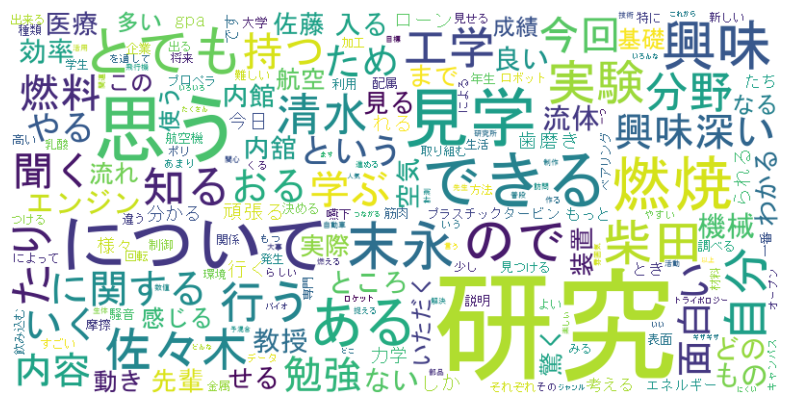

In [66]:
# 単語の頻度分析
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_comments)
word_counts = X.toarray().sum(axis=0)
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))

# Word Cloudの作成
# Word Cloudの作成
font_path = 'C:/Windows/Fonts/msgothic.ttc' 
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [67]:
mecab_process_comments = [mecab_process(comment) for comment in comments]
# mecab_process_comments

### WordCloudの作成

[('研究', 304), ('興味', 50), ('見学', 47), ('燃焼', 40), ('末永', 32), ('とても', 31), ('思っ', 28), ('柴田', 28), ('実験', 26), ('思い', 26), ('でき', 25), ('佐々木', 25), ('自分', 25), ('工学', 23), ('清水', 23), ('たり', 22), ('分野', 21), ('行っ', 20), ('今回', 18), ('燃料', 18)]


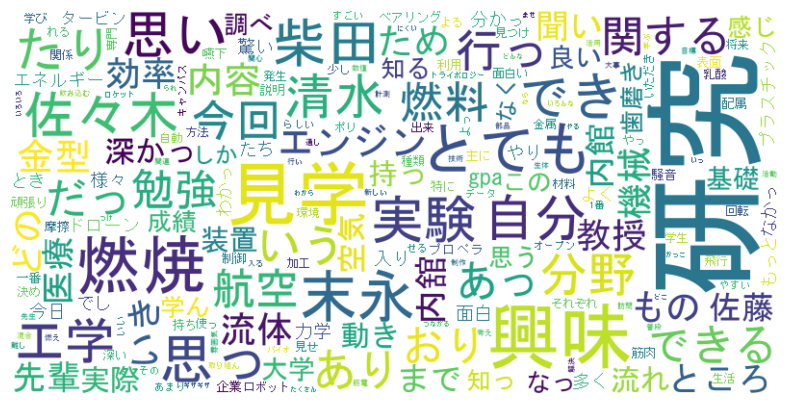

In [68]:
# 単語の頻度分析
from collections import Counter
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(mecab_process_comments)
word_counts = X.toarray().sum(axis=0)
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))

# 頻出単語の表示
print(Counter(word_freq).most_common(20))

# Word Cloudの作成
font_path = 'C:/Windows/Fonts/msgothic.ttc'  # 適切なフォントパスを指定
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [69]:
from collections import Counter

# トークン化された全ての単語を収集
all_tokens = [token for text in mecab_process_comments for token in text.split()]
# 単語の頻度をカウント
word_freq = Counter(all_tokens)
# 上位20個の頻出単語を表示
print(word_freq.most_common(20))


[('研究', 304), ('室', 129), ('研', 90), ('興味', 50), ('見学', 47), ('燃焼', 40), ('だ', 33), ('末永', 32), ('とても', 31), ('柴田', 28), ('思っ', 28), ('実験', 26), ('思い', 26), ('佐々木', 25), ('自分', 25), ('でき', 25), ('清水', 23), ('工学', 23), ('たり', 22), ('分野', 21)]


In [71]:
print(len(all_tokens))

3704


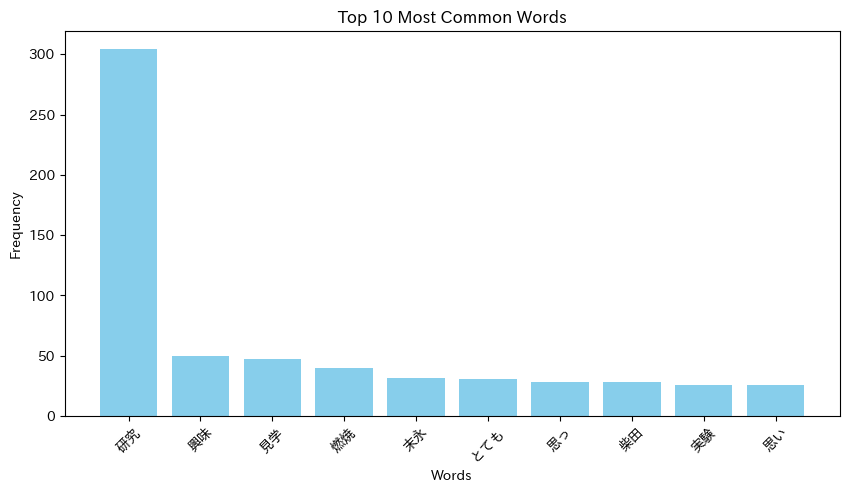

In [70]:
# 単語の頻度分析
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(mecab_process_comments)
word_counts = X.toarray().sum(axis=0)
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))

# 頻出単語の表示
most_common_words = Counter(word_freq).most_common(10)

# データをプロットするための準備
words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

# 棒グラフの作成
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()

c:\Users\UshiAI_sub\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\UshiAI_sub\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\UshiAI_sub\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12293 (\N{IDEOGRAPHIC ITERATION MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\UshiAI_sub\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12354 (\N{HIRAGANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\UshiAI_sub\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **k

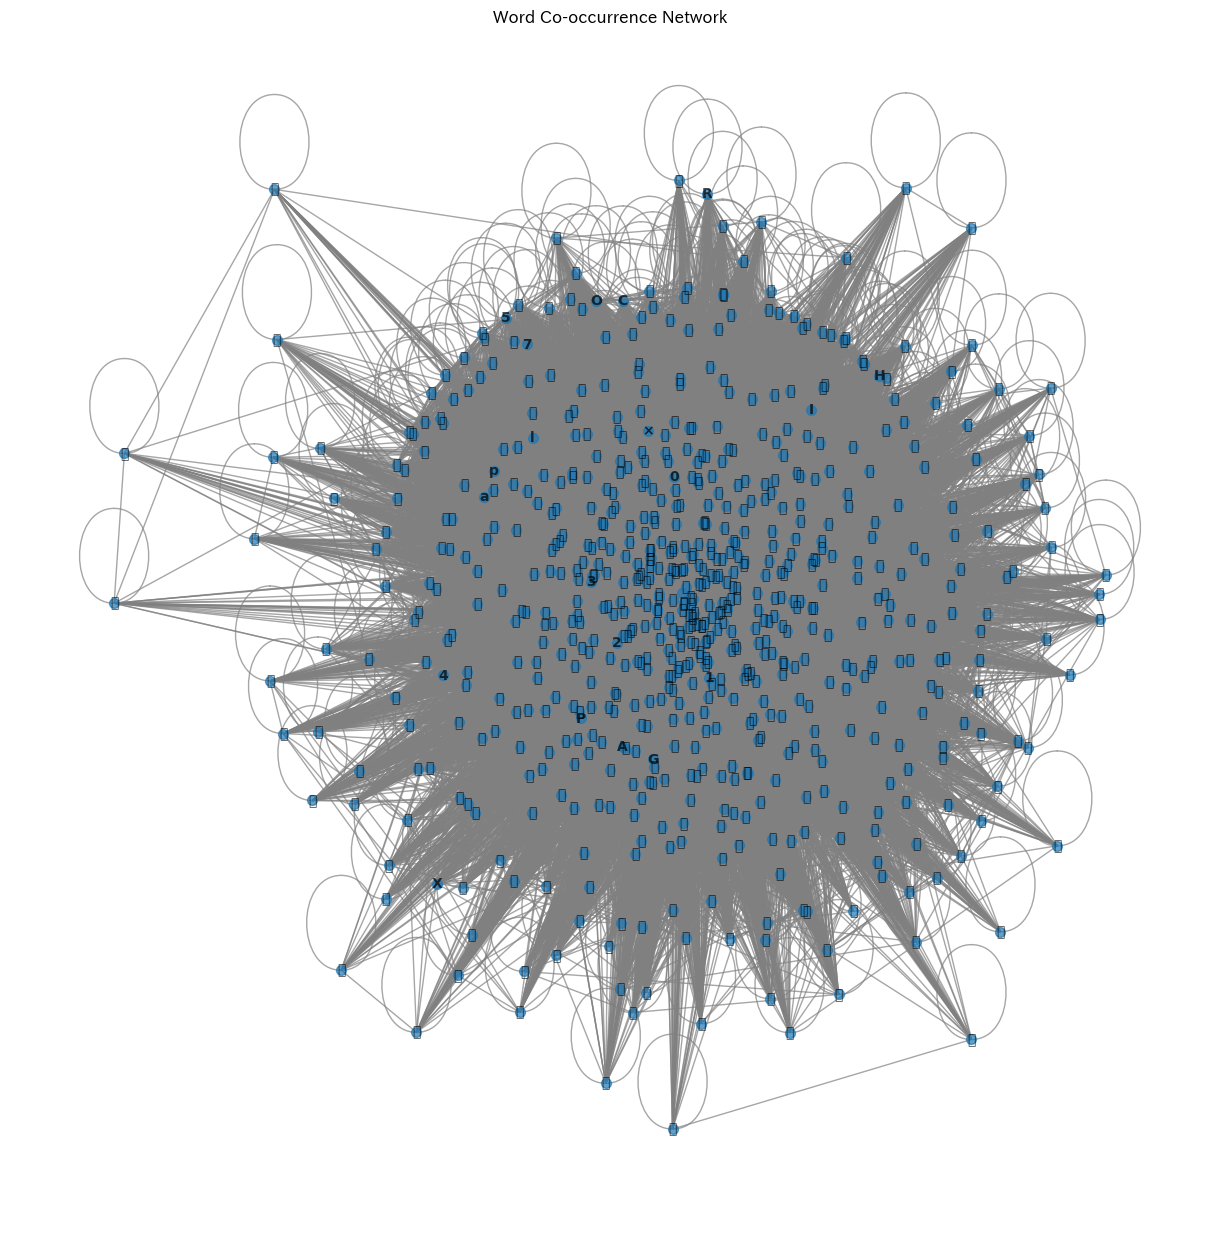

In [55]:

import networkx as nx# 共起行列の作成
vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
X = vectorizer.fit_transform(mecab_process_comments)
Xc = (X.T * X)  # 共起行列
Xc.setdiag(0)  # 対角成分をゼロに設定

# ネットワークの作成
G = nx.from_scipy_sparse_array(Xc)

# ノードのラベル設定
labels = {i: s for i, s in enumerate(vectorizer.get_feature_names_out())}
G = nx.relabel_nodes(G, labels)

# ネットワークの描画
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=10, font_color='black', font_weight='bold', alpha=0.7, edge_color='.5')
plt.title('Word Co-occurrence Network')
plt.show()